In [2]:
# Description: This program uses MFI to determine when to buy and sell stock

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
# Load the ZEEL stock data
df = pd.read_excel("Zeel2002to2020.xlsx", index_col=0, parse_dates=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-07-01,39.138096,38.481468,38.847958,38.878498,4031528,33.182491
2002-07-02,40.115402,38.542549,38.725796,39.214447,14152321,33.469227
2002-07-03,39.764183,38.863228,39.031200,39.565666,8456844,33.769001
2002-07-04,40.833111,39.306068,39.871075,39.535126,12745157,33.742931
2002-07-05,40.008511,39.015930,40.008511,39.351879,6445895,33.586536


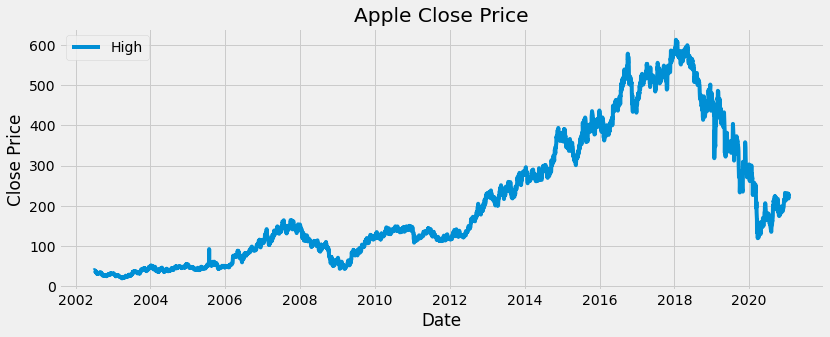

In [3]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close Price')
plt.title('ZEEL Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [4]:
# Calculate the typical price
typical_price = (df['Close'] + df['High'] + df['Low']) / 3
typical_price

Date
2002-07-01     38.832687
2002-07-02     39.290799
2002-07-03     39.397692
2002-07-04     39.891435
2002-07-05     39.458773
                 ...    
2021-01-15    226.700002
2021-01-18    219.416667
2021-01-19    224.100001
2021-01-20    227.883336
2021-01-21    227.483332
Length: 4607, dtype: float64

In [5]:
# Get the period
period = 14

In [6]:
# Calculate the money flow
money_flow = typical_price * df['Volume']
money_flow

Date
2002-07-01    1.565551e+08
2002-07-02    5.560560e+08
2002-07-03    3.331801e+08
2002-07-04    5.084226e+08
2002-07-05    2.543471e+08
                  ...     
2021-01-15    4.237114e+09
2021-01-18    3.062969e+09
2021-01-19    2.550979e+09
2021-01-20    2.476156e+09
2021-01-21    2.477165e+09
Length: 4607, dtype: float64

In [7]:
# Get all of the positive and negative money flows
positive_flow = []
negative_flow = []

# Loop through the typical price
for i in range(1, len(typical_price)):
    if typical_price[i] > typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif typical_price[i] < typical_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)
        

In [8]:
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
    positive_mf.append( sum(positive_flow[i + 1 - period : i+1]))
for i in range(period-1, len(negative_flow)):
    negative_mf.append( sum(negative_flow[i + 1 - period : i+1]))

In [9]:
# Calculate the money flow index
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf) ))
mfi

array([45.42521265, 40.19810249, 31.68546138, ..., 43.39971243,
       43.44265014, 36.75157156])

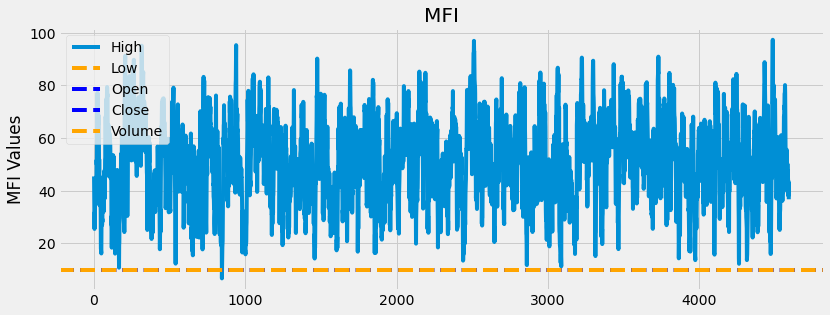

In [11]:
# Visually show the data
df2 = pd.DataFrame()
df2['MFI'] = mfi
# Create the plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['MFI'], label = 'MFI')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.axhline(10, linestyle= '--', color = 'blue')
plt.axhline(10, linestyle= '--', color = 'blue')
plt.axhline(10, linestyle= '--', color = 'orange')
plt.title('MFI')
plt.ylabel('MFI Values')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [12]:
# Create a new data frame
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi

In [13]:
new_df

,High,Low,Open,Close,Volume,Adj Close,MFI
Date,,,,,,,
2002-07-19,37.458347,36.236713,36.236713,36.511581,14291424,31.162363,45.425213
2002-07-22,35.977116,32.770329,35.809143,33.457497,13678965,28.555716,40.198102
2002-07-23,34.755486,32.235863,33.549122,34.465347,15143604,29.415911,31.685461
2002-07-24,33.900341,32.251133,33.900341,33.106277,10235891,28.255959,25.482950
2002-07-25,35.091434,33.060467,34.297371,33.518578,7693444,28.607851,31.727453
...,...,...,...,...,...,...,...
2021-01-15,233.600006,221.600006,229.000000,224.899994,18690401,224.899994,39.447740
2021-01-18,225.899994,214.350006,225.899994,218.000000,13959600,218.000000,38.098589
2021-01-19,226.949997,220.300003,221.000000,225.050003,11383216,225.050003,43.399712


In [14]:
def get_signal(data, high, low):
    buy_signal = []
    sell_signal = []
    
    for i in range(len(data['MFI'])):
        if data["MFI"][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif data['MFI'][i] < low:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else:
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
            
    return (buy_signal, sell_signal)

In [18]:
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]

new_df

,High,Low,Open,Close,Volume,Adj Close,MFI,Buy,Sell
Date,,,,,,,,,
2002-07-19,37.458347,36.236713,36.236713,36.511581,14291424,31.162363,45.425213,NaN,NaN
2002-07-22,35.977116,32.770329,35.809143,33.457497,13678965,28.555716,40.198102,NaN,NaN
2002-07-23,34.755486,32.235863,33.549122,34.465347,15143604,29.415911,31.685461,NaN,NaN
2002-07-24,33.900341,32.251133,33.900341,33.106277,10235891,28.255959,25.482950,NaN,NaN
2002-07-25,35.091434,33.060467,34.297371,33.518578,7693444,28.607851,31.727453,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-01-15,233.600006,221.600006,229.000000,224.899994,18690401,224.899994,39.447740,NaN,NaN
2021-01-18,225.899994,214.350006,225.899994,218.000000,13959600,218.000000,38.098589,NaN,NaN
2021-01-19,226.949997,220.300003,221.000000,225.050003,11383216,225.050003,43.399712,NaN,NaN


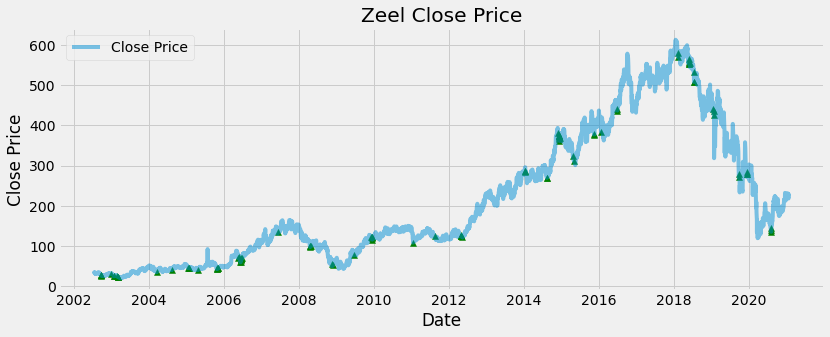

In [24]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['Close'], label = 'Close Price', alpha = 0.5)
plt.scatter(new_df.index, new_df['Buy'], color = 'green', marker = '^', alpha = 1)
# plt.scatter(new_df.index, new_df['Sell'], color = 'red', marker = 'v', alpha = 1)
plt.title('Zeel Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='upper left')
plt.show()

In [23]:
new_df['Buy'].head(50)

Date
2002-07-19          NaN
2002-07-22          NaN
2002-07-23          NaN
2002-07-24          NaN
2002-07-25          NaN
2002-07-26          NaN
2002-07-29          NaN
2002-07-30          NaN
2002-07-31          NaN
2002-08-01          NaN
2002-08-02          NaN
2002-08-05          NaN
2002-08-06          NaN
2002-08-07          NaN
2002-08-08          NaN
2002-08-09          NaN
2002-08-12          NaN
2002-08-13          NaN
2002-08-14          NaN
2002-08-15          NaN
2002-08-16          NaN
2002-08-19          NaN
2002-08-20          NaN
2002-08-21          NaN
2002-08-22          NaN
2002-08-23          NaN
2002-08-26          NaN
2002-08-27          NaN
2002-08-28          NaN
2002-08-29          NaN
2002-08-30          NaN
2002-09-02          NaN
2002-09-03          NaN
2002-09-04          NaN
2002-09-05          NaN
2002-09-06          NaN
2002-09-09          NaN
2002-09-10          NaN
2002-09-11          NaN
2002-09-12          NaN
2002-09-13          NaN
2002-09-16 